# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 


В данном проекте мы сделаем предобработку данных, а также изучим их на предмет особенностей и зависимостей, которые существуют на рынке недвижимости.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# откроем данные и ознакомимся с первыми 20 строками
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
pd.set_option('display.max_columns', None)

display(df.head(20))


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
# теперь посмотрим на количество строк, столбцов, и взглянем на общую информацию о датасете
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

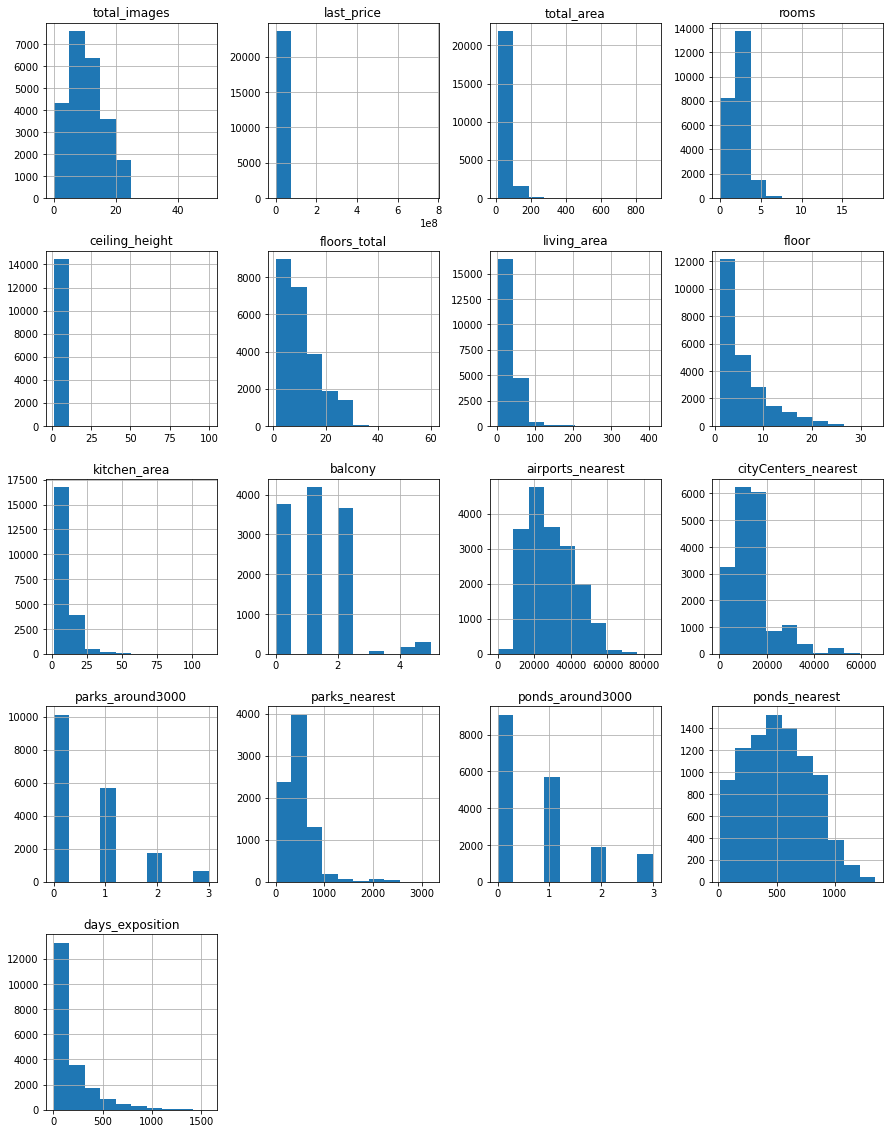

In [3]:
# и построим диаграммы
df.hist(figsize=(15,20), bins=10)

In [4]:
# вызовем этот метод, чтобы посмотреть на особенности в каждом столбике: например, на максимальные и минимальные значения
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Итак, мы видим, что в данном датафрейме 23699 строк и 22 колонки. Колонки названы хорошо, приведены к единой стилистике.

После вызова метода **info()** видно, что тип данных в некоторых из столбцов не соответствует ожидаемому, это нужно будет исправить. Также мы видим несооответствие количества ненулевых значений и числа строк, что указывает на пропуски. 

Помимо этого, мы построили гистограммы для каждого из столбцов и сделали достаточно большое количество корзин, чтобы лучше увидеть распределение данных. Беглый вывод по **сырым** данным из тех, где видно распределение:

 * в среднем для объекта выкладывают 10 фотографий
 * средняя цена составляет от 3 до 5 миллионов
 * пик общей площади — до 100 метров
 * чаще выставляют 1-2-комнатные квартиры
 * высота потолков — 2.4-2.8 метров
 * этажность дома — в целом до 10 этажей
 * жилая площадь обычно до 70 метров
 * этаж квартиры — в основном до 6
 * средняя площадь кухни около 8-9 метров
 * почти нет квартир, где было бы более 2 балконов
 * большинство объектов находятся в 20-30 км от аэропорта и почти никогда не далее 20 км от центра города
 * у подавляющего большинстра объектов отсутствуют парки или пруды в радиусе 3 км
 * противоречащие предыдущей строке данные: у многих есть парк или пруд на расстоянии до 1 км
 * большинство объектов размещены на сайте до 150 дней


### Предобработка данных

На этом шаге нам предстоит избавиться от явных проблем в датасете. 

In [5]:
# взглянем на количество пропущенных значений
df.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Мы видим интересную особенность: в столбцах **parks_around3000** и  **ponds_around3000**  отсутствует одинаковое количество значений. В столбце **balcony** значения пропущены, вероятно, потому что в объекте нет балкона. Данные в столбце **is apartment** могут быть пропущены из-за того, что объект не является апартаментами. Также много пропусков в картографических данных, на дальнейших этапах мы будем обрабатывать эти данные.

In [6]:
# удаляем строки с пропущенными значениями в floors_total и locality_name, их мало, и это не сильно скажется на датасете
df = df.dropna(subset=['locality_name'])
df = df.dropna(subset=['floors_total']).reset_index()

# убеждаемся, что строки удалены
df.isna().sum()

index                       0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [7]:
# заменим значения в столбцах balcony, parks_around3000 и ponds_around3000 на 0                      
df['balcony'] = df['balcony'].fillna(0) 
df['parks_around3000'] = df['parks_around3000'].fillna(0) 
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

# заменим значение столбца is_apartment на False (заодно сменится тип на Булев)
df['is_apartment'] = df['is_apartment'].fillna(False) 

# заменим значения столбцов ниже на маркер, чтобы потом можно было использовать эти данные
df['days_exposition'] = df['days_exposition'].fillna(-555) 
df['airports_nearest'] = df['airports_nearest'].fillna(-555)
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(-555)
df['parks_nearest'] = df['parks_nearest'].fillna(-555)
df['ponds_nearest'] = df['ponds_nearest'].fillna(-555)

# еще раз убедимся, что пропусков стало меньше
df.isna().sum()

index                      0
total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9084
floors_total               0
living_area             1865
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2222
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

In [8]:
import warnings
warnings.filterwarnings(action='ignore', message='Mean of empty slice')

# высоту потолка изменим на медианную высоту, характерную для данного поселения 
for locality in df['locality_name'].unique():
    df.loc[df['locality_name'] == locality,'ceiling_height'
            ] = df.loc[df['locality_name'] == locality, 'ceiling_height'
                        ].fillna(df.loc[df['locality_name'] == locality,'ceiling_height'].median())

# рассчитаем отсутствующую площадь кухни с помощью коэффициента с учетом общей площади и количества комнат
df['coeff_kitchen_area'] = df['kitchen_area'] / df['total_area']
rooms_coeff_kitchen_area = df.query('kitchen_area > 0').pivot_table(index='rooms', values='coeff_kitchen_area')

# взглянем на коэффициент, чтобы убедиться в его правдоподобности
print(rooms_coeff_kitchen_area)

# делаем замены в пропусках площади кухни
for room in rooms_coeff_kitchen_area.index:
    df.loc[(df['rooms'] == room) & (df['kitchen_area'
          ].isna()), 'kitchen_area'] = df.loc[(df['rooms'] == room) & (df['kitchen_area'
                        ].isna()), 'total_area'] * rooms_coeff_kitchen_area.loc[room, 'coeff_kitchen_area']

# оставшиеся пропуски заменим на 0
df['kitchen_area'] = df['kitchen_area'].fillna(0)  


# этот код мы честно подсмотрели в чате и хотели бы пояснений, как он работает. Выглядит красиво, но непонятно
# по аналогии рассчитаем недостающую жилую площадь на объекте
df['living_area'] = df.groupby(['rooms', 'total_area'])['living_area'].apply(lambda x: x.fillna(x.median()))
df['living_area'].fillna(df['living_area'].median(), inplace=True)
    

       coeff_kitchen_area
rooms                    
1                0.249876
2                0.174103
3                0.140838
4                0.124073
5                0.113455
6                0.103428
7                0.091932
8                0.091708
9                0.075054
10               0.088013
11               0.066855
12               0.124444
14               0.075636
15               0.169492
16               0.048148
19               0.073679


In [9]:
# еще раз проверим. оставим 120 пропусков в высоте потолков
# также заменим 2269 пропусков во "вспомогательном" столбце с коэффициентом кухни
# мы не знаем, как это вышло
df.isna().sum()

index                      0
total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height           120
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
coeff_kitchen_area      2222
dtype: int64

In [10]:
# заменяем пропуски в коэффициенте для расчета площади кухни 
df['coeff_kitchen_area'] = df['coeff_kitchen_area'].fillna(0)

# и делаем еще одну проверку, чтобы убедиться, что все хорошо
df.isna().sum() 

index                     0
total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height          120
floors_total              0
living_area               0
floor                     0
is_apartment              0
studio                    0
open_plan                 0
kitchen_area              0
balcony                   0
locality_name             0
airports_nearest          0
cityCenters_nearest       0
parks_around3000          0
parks_nearest             0
ponds_around3000          0
ponds_nearest             0
days_exposition           0
coeff_kitchen_area        0
dtype: int64

In [11]:
# проверим, поменялись ли средние и медианные величины после заполнения пропусков
df.describe()


,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coeff_kitchen_area
count,23565.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23445.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,11846.826183,9.878421,6.540058e+06,60.322824,2.070656,2.733913,10.675875,34.297040,5.878124,10.445111,0.593677,21916.501125,10749.971738,0.468831,-198.708424,0.589900,-143.447104,81.737110,0.169675
std,6842.594114,5.681156,1.091093e+07,35.657060,1.078591,1.014787,6.594823,21.659097,4.871485,5.872276,0.960660,16637.126905,9787.303804,0.748403,534.183592,0.883966,549.532296,323.770772,0.088437
min,0.000000,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,-555.000000,-555.000000,0.000000,-555.000000,0.000000,-555.000000,-555.000000,0.000000
25%,5921.000000,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.041881,0.000000,10143.000000,2186.000000,0.000000,-555.000000,0.000000,-555.000000,22.000000,0.120930
50%,11850.000000,9.000000,4.646000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.100000,0.000000,21854.000000,11246.000000,0.000000,-555.000000,0.000000,-555.000000,73.000000,0.162162
75%,17774.000000,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.050000,8.000000,11.870000,1.000000,34324.000000,15237.000000,1.000000,301.000000,1.000000,389.000000,198.000000,0.223881
max,23698.000000,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,123.463803,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,0.787879


Этап замены пропусков окончен. Для начала мы удалили несущественное количество строк с пропусками в столбцах с названием поселения и общим количеством этажей в доме.

Далее мы заменили пропуски в значениях **balcony** на 0: это данные, добавленные пользователем, соответственно, если там стоит пропуск — балконы отсутствуют. Также заменили пропуски на булев тип значений в столбце **is_apartment**, руководствуясь той же логикой, что и с балконами. 

После этого мы заменили на 0 пропуски в столбцах с числом парков и прудов на расстоянии 3 км от объекта. Видимо, картографические данные для этих объявлений отсутствуют: это может быть, например, из-за того, что объект располагается в деревне. Возможно, парков и прудов там просто нет. 

В столбце с информацией о том, сколько дней было размещено объявление пропуски могут объясняться тем, что объявление актуально. Мы проставили маркер в пропущенных значениях, чтобы их можно было использовать впоследствии, и чтобы картина не была искажена из-за какой-либо замены данных. 

В столбцах с расстоянием до аэропорта, центра города, ближайшего парка и пруда мы тоже оставили маркеры. Например, в столбце с данными про аэропорт пропуски стоят потому, что до него слишком далеко, и эта информация неактуальна: например, пропуски в этом столбце стоят в объектах в Выборге. 

Пропуски в высоте потолка мы заменили медианным значением для данной местности. Объясним, почему мы не сгруппировали медианой по этажам: например, двухэтажный дом может быть как хрущевкой с невысокими потолками(видели такие собственными глазами), так и коттеджем. Пятиэтажка может быть как той же хрущевкой, так и сталинкой с высокими потолками. Группировка по местности кажется более приемлемым вариантом: в элитном коттеджном поселке медианная высота будет больше, чем в обычном селе. 

Кухню рассчитали, используя коэффициент, на основе столбцов с общей площадью и количеством комнат. Наверняка, в квартире с большой общей площадью кухня составляет мЕньшую часть, при этом квартиры с 1 комнатой и квартиры с 3 комнатами могут быть равны по площади. Аналогичным образом поступили с жилой площадью.

В конце мы убедились, что замена данных прошла успешно: изменились средние и медианные значения в столбцах.

**Приступим к смене типа данных**

In [12]:
# установим целый тип чисел там, где они должны быть 
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

# приведем столбец с датой публикации к временному типу
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# сделаем проверку
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23565 non-null  int64         
 1   total_images          23565 non-null  int64         
 2   last_price            23565 non-null  float64       
 3   total_area            23565 non-null  float64       
 4   first_day_exposition  23565 non-null  datetime64[ns]
 5   rooms                 23565 non-null  int64         
 6   ceiling_height        23445 non-null  float64       
 7   floors_total          23565 non-null  int64         
 8   living_area           23565 non-null  float64       
 9   floor                 23565 non-null  int64         
 10  is_apartment          23565 non-null  bool          
 11  studio                23565 non-null  bool          
 12  open_plan             23565 non-null  bool          
 13  kitchen_area    

**Приступим к обработке дубликатов**

In [13]:
# ищем явные дубликаты и радуемся их отсутствию
df.duplicated().sum() 

0

In [14]:
# ищем неявные дубликаты в названиях поселений (в других столбцах одинаковые данные не будут считаться дубликатами)
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
# приводим названия поселений к нижнему регистру
df['locality_name'] = df['locality_name'].str.lower()

# заменяем "ё" на "е"
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex = True)
df['locality_name'] = df['locality_name'].str.replace('деревня ', '', regex = True)

# а также избавимся от обозначений поселений, чтобы было удобно проводить дополнительную визуальную проверку
df['locality_name'] = df['locality_name'].str.replace('село ', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('поселок ', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('городского типа ', '', regex = True)
df['locality_name'] = df['locality_name'].str.replace('городской ', '', regex = True)

# убеждаемся, что мы избавились от неявных дубликатов
print(sorted(df['locality_name'].unique()))

['агалатово', 'александровская', 'алексеевка', 'аннино', 'аро', 'барышево', 'батово', 'бегуницы', 'белогорка', 'белоостров', 'бокситогорск', 'большая вруда', 'большая ижора', 'большая пустомержа', 'большие колпаны', 'большое рейзино', 'большой сабск', 'бор', 'борисова грива', 'бугры', 'будогощь', 'ваганово', 'важины', 'вартемяги', 'вахнова кара', 'виллози', 'вознесенье', 'возрождение', 'войсковицы', 'войскорово', 'володарское', 'волосово', 'волхов', 'всеволожск', 'выборг', 'вырица', 'выскатка', 'высокоключевой', 'высоцк', 'гаврилово', 'гарболово', 'гатчина', 'гладкое', 'глажево', 'глебычево', 'глинка', 'гончарово', 'горбунки', 'гостилицы', 'громово', 'дзержинского', 'дружная горка', 'дружноселье', 'дубровка', 'елизаветино', 'ефимовский', 'жилгородок', 'жилпоселок', 'житково', 'заводской', 'заклинье', 'заневка', 'запорожское', 'зеленогорск', 'зимитицы', 'ивангород', 'извара', 'ильичево', 'имени морозова', 'имени свердлова', 'иссад', 'калитино', 'каложицы', 'кальтино', 'каменногорск', 'к

В предыдущих двух шагах мы поменяли типы данных (меняли вещественный тип на целое число: например, этажей, балконов, парков и тд может быть только целое количество), а также убедились в отсутствии явных дубликатов, и заменили неявные дубликаты в единственном столбце с названиями поселений.

**Приступим к обработке аномальных значений**

In [16]:
# для начала посмотрим на аномально большие или маленькие значения в датафрейме
df.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coeff_kitchen_area
count,23565.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23445.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,11846.826183,9.878421,6.540058e+06,60.322824,2.070656,2.733913,10.675875,34.297040,5.878124,10.445111,0.593677,21916.501125,10749.971738,0.468831,-198.708424,0.589900,-143.447104,81.737110,0.169675
std,6842.594114,5.681156,1.091093e+07,35.657060,1.078591,1.014787,6.594823,21.659097,4.871485,5.872276,0.960660,16637.126905,9787.303804,0.748403,534.183592,0.883966,549.532296,323.770772,0.088437
min,0.000000,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,-555.000000,-555.000000,0.000000,-555.000000,0.000000,-555.000000,-555.000000,0.000000
25%,5921.000000,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.041881,0.000000,10143.000000,2186.000000,0.000000,-555.000000,0.000000,-555.000000,22.000000,0.120930
50%,11850.000000,9.000000,4.646000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.100000,0.000000,21854.000000,11246.000000,0.000000,-555.000000,0.000000,-555.000000,73.000000,0.162162
75%,17774.000000,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.050000,8.000000,11.870000,1.000000,34324.000000,15237.000000,1.000000,301.000000,1.000000,389.000000,198.000000,0.223881
max,23698.000000,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,123.463803,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,0.787879


In [17]:
# создадим новую переменную для отфильтрованного датасета
df_filtered = df

In [18]:
# начнем с аномального значения ceiling_height: 100 метров. Посмотрим, какие еще есть слишком крупные значения
sorted(df_filtered['ceiling_height'].unique())

# все значения выше 15 метров поделим на 10: очевидно, что точка стоит не на своем месте
df_filtered.loc[df_filtered['ceiling_height'] > 15, 'ceiling_height'] = \
df_filtered.loc[df_filtered['ceiling_height'] > 15, 'ceiling_height'] / 10

(0.0, 5.0)

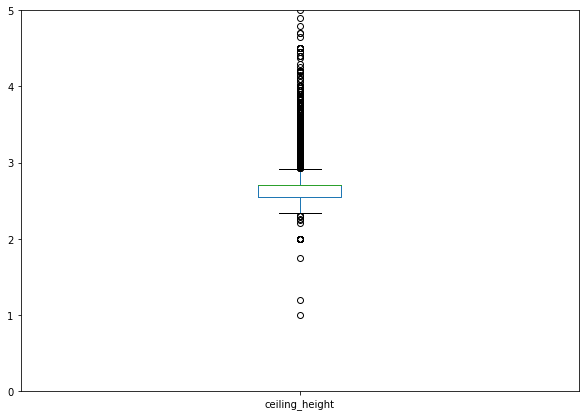

In [19]:
# построим диаграмму размаха 
import matplotlib.pyplot as plt
df_filtered['ceiling_height'].plot(kind='box', figsize=(10,7))
plt.ylim(0,5)

In [20]:
# на диаграмме мы видим, что стандартная высота потолков от 2.4 до 5 метров
# удалим все значения ниже 2 и выше 5 метров
df_filtered = df_filtered[df_filtered['ceiling_height'] >= 2] 
df_filtered = df_filtered[df_filtered['ceiling_height'] <= 5]


Итак, мы разобрались с аномальными значениями столбца **ceiling_height**, оставив только те, которые вписываются в "стандартные" значения. Теперь займемся остальными столбцами, аномалии в которых мы видели выше, вызвав метод **describe()**.  

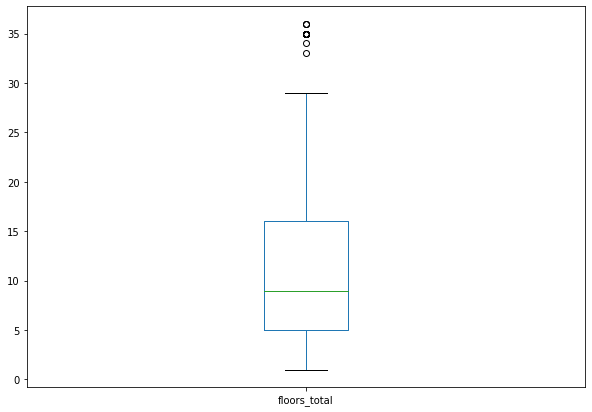

In [21]:
# начнем с аномального значения floors_total: 60 этажей. Судя по найденной информации, самое высокое жилое здание
# в Санкт-Петербурге – ЖК Князь Александр Невский, 37 этажей
# посмотрим на здания, этажность которых выше 37

df_filtered.query('floors_total > 37')[['locality_name','floors_total']]

# видимо, высота в 60 этажей в Кронштадте – это на самом деле 6 этажей. Исправим ошибку и заодно удалим здание в 52 этажа
df_filtered.loc[df_filtered['floors_total'] == 60, 'floors_total'] = df_filtered.loc[df_filtered['floors_total']\
== 60, 'floors_total']/ 10
df_filtered = df_filtered[df_filtered['floors_total'] <= 37]

# построим диаграмму размаха, а затем удалим выбросы
df_filtered['floors_total'].plot(kind='box', figsize=(10,7))
df_filtered = df_filtered.loc[df_filtered['floors_total'] < 30]


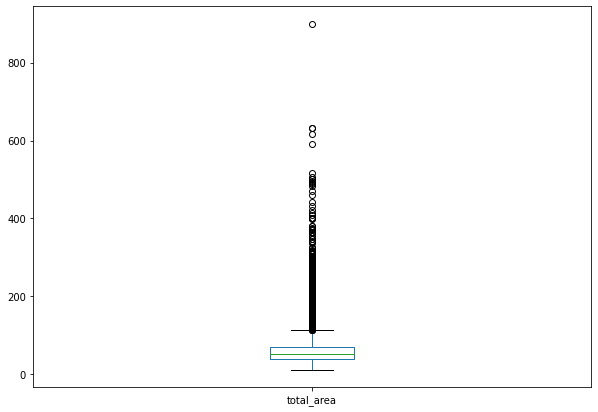

In [22]:
# для столбца total_area построим диаграмму размаха. Максимальное значение в методе describe() было 900 метров, выглядит
# правдоподобно, то есть опечаток нет. В таком случае, просто удалим выбросы
df_filtered['total_area'].plot(kind='box', figsize=(10,7))

# удаляем выбросы выше 300 метров
df_filtered = df_filtered.loc[df_filtered['total_area'] < 300]

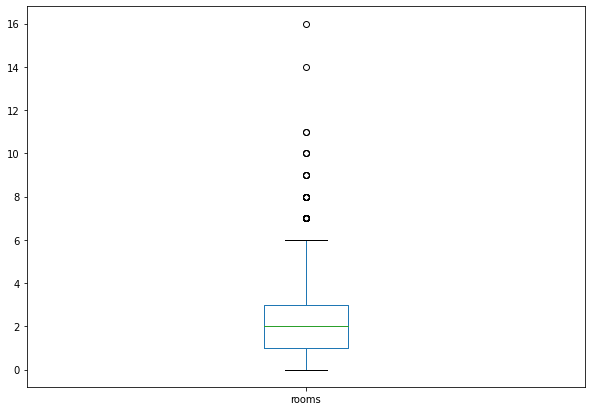

In [23]:
# построим диаграмму размаха и удалим выбросы в числе комнат больше 10
df_filtered['rooms'].plot(kind='box', figsize=(10,7))
df_filtered = df_filtered.loc[df_filtered['rooms'] <= 10]

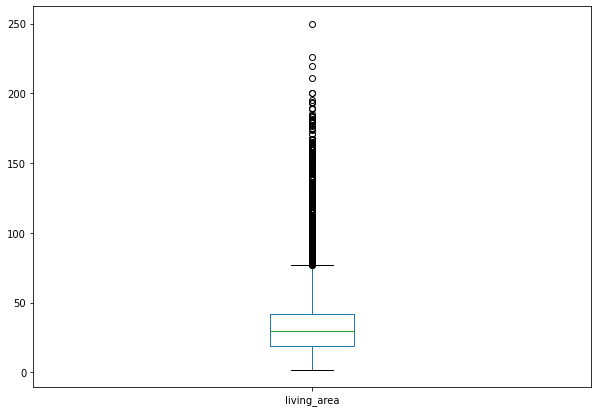

In [24]:
# построим диаграмму размаха и удалим выбросы в жилой площади более 72 метров
df_filtered['living_area'].plot(kind='box', figsize=(10,7))
df_filtered = df_filtered.loc[df['living_area'] < 72]


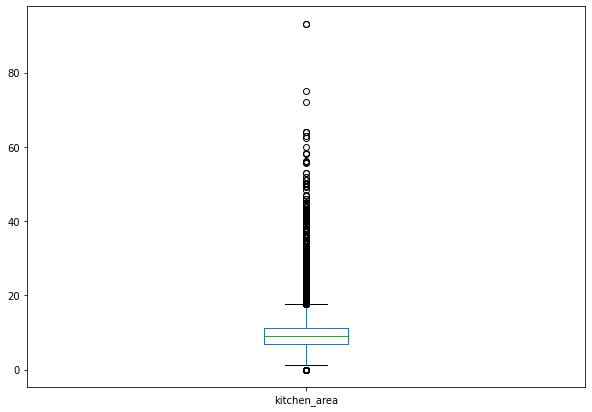

In [25]:
# построим диаграмму размаха и удалим выбросы в площади кухни
df_filtered['kitchen_area'].plot(kind='box', figsize=(10,7))
df_filtered = df_filtered.loc[df['kitchen_area'] <= 20]


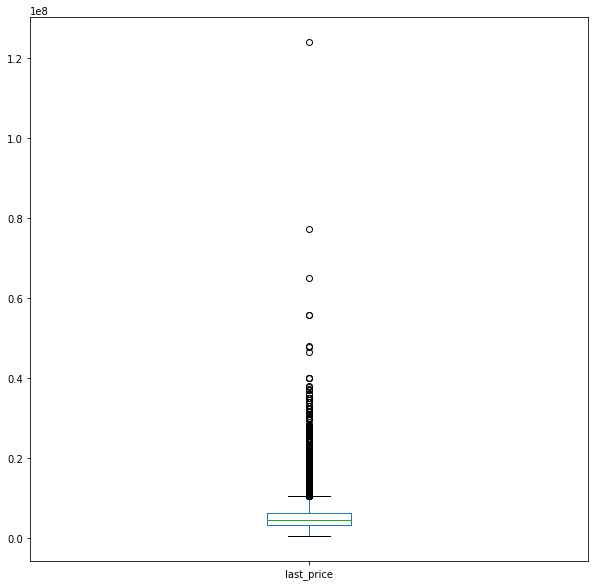

In [26]:
# построим диаграмму размаха и удалим выбросы в цене
df_filtered['last_price'].plot(kind='box', figsize=(10,10))
df_filtered = df_filtered.loc[df['last_price'] <= 6000000]
df_filtered = df_filtered.loc[df['last_price'] > 900000]

In [27]:
# посмотрим на обновленные средние и медианные значения
df_filtered.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coeff_kitchen_area
count,15879.000000,15879.000000,1.587900e+04,15879.000000,15879.000000,15879.000000,15879.000000,15879.000000,15879.000000,15879.00000,15879.000000,15879.000000,15879.000000,15879.000000,15879.000000,15879.000000,15879.000000,15879.000000,15879.000000
mean,11877.600227,9.350337,3.859598e+06,46.604859,1.727313,2.640697,10.477549,26.663016,5.723408,8.52712,0.577681,19938.924617,11218.847849,0.346432,-283.135210,0.424775,-219.135147,88.920398,0.173877
std,6833.091482,5.373539,1.173326e+06,13.404362,0.827298,0.142357,6.452154,10.327818,4.799633,2.72617,0.886276,17834.934456,10675.649797,0.652168,481.162061,0.734151,528.060900,292.963034,0.086172
min,1.000000,0.000000,9.100000e+05,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.00000,0.000000,-555.000000,-555.000000,0.000000,-555.000000,0.000000,-555.000000,-555.000000,0.000000
25%,5960.500000,6.000000,3.070000e+06,36.090000,1.000000,2.535000,5.000000,17.800000,2.000000,6.50000,0.000000,-555.000000,-555.000000,0.000000,-555.000000,0.000000,-555.000000,26.000000,0.125000
50%,11848.000000,9.000000,3.900000e+06,44.200000,2.000000,2.640000,9.000000,27.000000,4.000000,8.21000,0.000000,18023.000000,11978.000000,0.000000,-555.000000,0.000000,-555.000000,69.000000,0.171429
75%,17788.500000,13.000000,4.750000e+06,55.000000,2.000000,2.700000,15.000000,32.000000,8.000000,10.00000,1.000000,34018.000000,15976.000000,1.000000,90.000000,1.000000,260.000000,186.000000,0.235294
max,23698.000000,39.000000,6.000000e+06,190.000000,5.000000,4.500000,29.000000,71.000000,27.000000,20.00000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,0.739837


In [28]:
# а теперь посмотрим на старые средние и медианные значения
df.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,coeff_kitchen_area
count,23565.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23445.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000
mean,11846.826183,9.878421,6.540058e+06,60.322824,2.070656,2.706961,10.675875,34.297040,5.878124,10.445111,0.593677,21916.501125,10749.971738,0.468831,-198.708424,0.589900,-143.447104,81.737110,0.169675
std,6842.594114,5.681156,1.091093e+07,35.657060,1.078591,0.287405,6.594823,21.659097,4.871485,5.872276,0.960660,16637.126905,9787.303804,0.748403,534.183592,0.883966,549.532296,323.770772,0.088437
min,0.000000,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,-555.000000,-555.000000,0.000000,-555.000000,0.000000,-555.000000,-555.000000,0.000000
25%,5921.000000,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,18.600000,2.000000,7.041881,0.000000,10143.000000,2186.000000,0.000000,-555.000000,0.000000,-555.000000,22.000000,0.120930
50%,11850.000000,9.000000,4.646000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.100000,0.000000,21854.000000,11246.000000,0.000000,-555.000000,0.000000,-555.000000,73.000000,0.162162
75%,17774.000000,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.050000,8.000000,11.870000,1.000000,34324.000000,15237.000000,1.000000,301.000000,1.000000,389.000000,198.000000,0.223881
max,23698.000000,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,123.463803,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,0.787879


После сравнения старой и новой таблиц видим, что данные поменялись. 

Что мы сделали на этом этапе: нашли и удалили редкие и выбивающиеся значения.
Чем могли обуславливаться аномалии: при введении некоторых значений пользователем была допущена опечатка. Также были аномально высокие, но "настоящие" значения, это абсолютно нормально. Мы избавились от таких значений, чтобы они не портили наши расчеты.

Предобработку данных можно считать выполненной: мы избавились от строк с пропусками, в остальных пропусках сделали логичную замену, поменяли типы данных, а также отсеяли аномальные значения (при этом исправив ошибки в веденных данных). 

### Посчитайте и добавьте в таблицу новые столбцы

**Наша задача — добавить столбцы, которые будут помогать нам в последующих расчетах.**

In [29]:
# сделаем столбец с расчетом цены за 1 кв.м. и округлим числа до двух знаков после запятой
df_filtered['price_for_1sq_m'] = df_filtered['last_price'] / df_filtered['total_area']
df_filtered['price_for_1sq_m'] = df_filtered['price_for_1sq_m'].round(2)

# убедимся, что расчеты прошли успешно
print(df_filtered['price_for_1sq_m'])

1         82920.79
2         92785.71
5         95065.79
6         99195.71
8         87454.76
           ...    
23556    105769.23
23558     45000.00
23559     73717.95
23561     52542.37
23564     41795.67
Name: price_for_1sq_m, Length: 15879, dtype: float64


In [30]:
# приступаем к созданию столбца с днями недели 
df_filtered['weekday'] = df_filtered['first_day_exposition'].dt.weekday 

#делаем проверку
print(df_filtered['weekday'])

1        1
2        3
5        0
6        3
8        2
        ..
23556    3
23558    4
23559    4
23561    0
23564    4
Name: weekday, Length: 15879, dtype: int64


In [31]:
# приступаем к созданию столбца с днями недели и делаем проверку
df_filtered['month'] = df_filtered['first_day_exposition'].dt.month
print(df_filtered['month'])

1        12
2         8
5         9
6        11
8         5
         ..
23556     7
23558     7
23559     8
23561     1
23564     7
Name: month, Length: 15879, dtype: int64


In [32]:
# приступаем к созданию столбца с днями недели и делаем проверку
df_filtered['year'] = df_filtered['first_day_exposition'].dt.year
print(df_filtered['year'])

1        2018
2        2015
5        2018
6        2017
8        2018
         ... 
23556    2018
23558    2017
23559    2016
23561    2018
23564    2017
Name: year, Length: 15879, dtype: int64


In [33]:
# делаем функцию, которая бы разделила этажи по категориям: первый, последний и другой
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df_filtered['floor_type'] = df_filtered.apply(floor_type, axis=1)

# проверяем результат
print(df_filtered['floor_type'])

1        первый
2        другой
5        другой
6        другой
8        другой
          ...  
23556    другой
23558    другой
23559    другой
23561    другой
23564    первый
Name: floor_type, Length: 15879, dtype: object


In [34]:
# переводим столбец с расстоянием до центра в км, не забывая про наш маркер со значением -555. Отсеем все, что меньше 0
df_filtered['km_to_center'] = df_filtered.loc[df_filtered['cityCenters_nearest'] >= 0, 'cityCenters_nearest'] / 1000

# округляем и проверяем результат. На этом этапе видим, что пропуски снова появились
df_filtered['km_to_center'] = df_filtered['km_to_center'].round()
print(df_filtered['km_to_center'])

1        19.0
2        14.0
5         NaN
6        19.0
8         NaN
         ... 
23556     6.0
23558     NaN
23559    34.0
23561     NaN
23564     NaN
Name: km_to_center, Length: 15879, dtype: float64


Мы только что добавили к датафрейму столбцы, которые нам помогут в дальшейших расчетах. На последнем шаге мы столкнулись с маркером, который поставили заранее и отфильтровали данные таким образом, чтобы маркер не влиял на расчеты.Теперь можно приступать непосредственно к анализу.

### Проведите исследовательский анализ данных

На данном этапе будем заниматься визуализацией данных. Подробные выводы будем оставлять под группой графиков, объединенных общим параметром, чтобы было удобно читать и одновременно смотреть нужные графики. Обобщающий вывод будет в конце каждого этапа исследовательского анализа. 

Цель этапа: увидеть интересные зависимости и посмотреть на распределение значений.

Text(0, 0.5, 'Количество квартир')

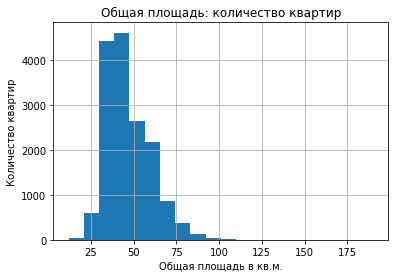

In [35]:
# построим гистограмму для общей площади
df_filtered['total_area'].hist(bins=20)
plt.title('Общая площадь: количество квартир')
plt.xlabel('Общая площадь в кв.м.')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

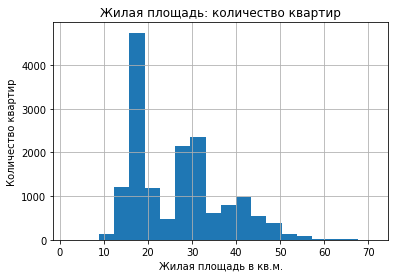

In [36]:
df_filtered['living_area'].hist(bins=20)
plt.title('Жилая площадь: количество квартир')
plt.xlabel('Жилая площадь в кв.м.')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

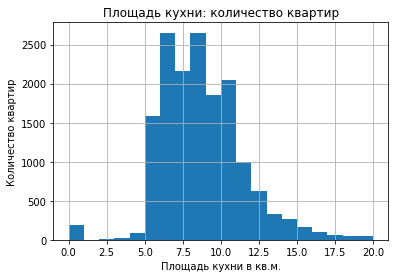

In [37]:
df_filtered['kitchen_area'].hist(bins=20)
plt.title('Площадь кухни: количество квартир')
plt.xlabel('Площадь кухни в кв.м.')
plt.ylabel('Количество квартир')

Наблюдения по площади: графики выглядят достаточно чисто и органично, распределение нормальное.  В среднем, пик общей площади - до 50 метров. 

При этом пики жилой площади приходятся на 20 и 30 метров, чуть меньше - 30 и 40 квадратных метров. После 40 метров наблюдаем резкое падение количества квартир. 

Средняя площадь кухни - от 6 до 11 метров. 

Text(0, 0.5, 'Количество квартир')

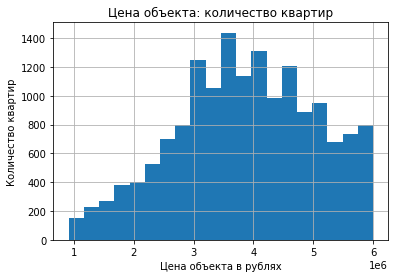

In [38]:
df_filtered['last_price'].hist(bins=20)
plt.title('Цена объекта: количество квартир')
plt.xlabel('Цена объекта в рублях')
plt.ylabel('Количество квартир')

Количество объектов стоимостью от 900 тысяч до 3 миллионов растет плавно, затем у нас резкий всплеск количества объектов с ценой от 3 миллионов рублей. Пиковые значения также наблюдаются с шагом в 500 тысяч, после чего идет небольшое падение количества объектов ценой в 5.5 миллионов. После этого наблюдается небольшой подъем.

Text(0, 0.5, 'Количество квартир')

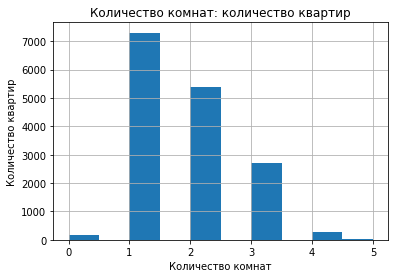

In [39]:
df_filtered['rooms'].hist()
plt.title('Количество комнат: количество квартир')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

Студий - меньшинство. Самое большое значение - 1-2 комнаты. Квартир с 4 и больше комнатами почти нет. 

Text(0, 0.5, 'Количество квартир')

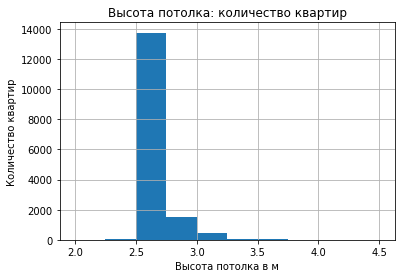

In [40]:
df_filtered['ceiling_height'].hist()
plt.title('Высота потолка: количество квартир')
plt.xlabel('Высота потолка в м')
plt.ylabel('Количество квартир')

Высота потолков, как правило, стандартная: 2.75. Довольно много объектов с потолками высотой 2.50 метров. Выше 2.75 почти не бывает, хотя есть отдельные объекты с потолками почти 4 метра. 

Text(0, 0.5, 'Количество квартир')

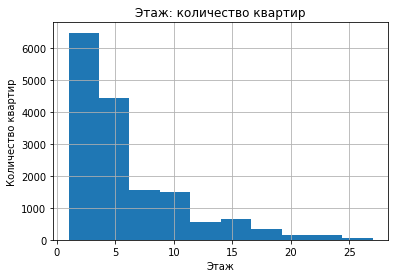

In [41]:
df_filtered['floor'].hist(bins=10)
plt.title('Этаж: количество квартир')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

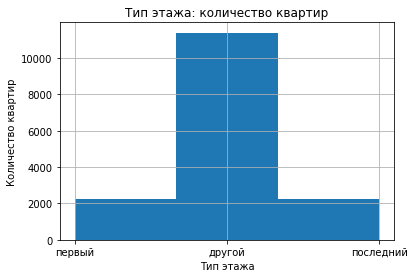

In [42]:
df_filtered['floor_type'].hist(bins=3)
plt.title('Тип этажа: количество квартир')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

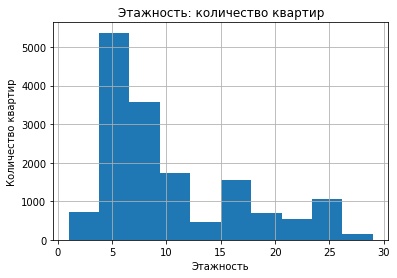

In [43]:
df_filtered['floors_total'].hist(bins=10)
plt.title('Этажность: количество квартир')
plt.xlabel('Этажность')
plt.ylabel('Количество квартир')

Мы видим, что количество объектов на этажах с 1 по 5 больше всего. После 5 этажа выборка существенно снижается, и еще раз резко падает после 10 этажа. Наверное, это связано с типовой застройкой и можем предположить, что в данной выборке квартиры на 5 и 10 этажах находятся на последнем этаже в доме. 

Ожидаемо, что большинство квартир входят в категорию "другой этаж".

Если смотреть на этажность дома, то большинство домов - от 5 до 10 этажей с большим всплеском на 15-17 этажах и почти с таким же большим на 23-25.

Text(0, 0.5, 'Количество квартир')

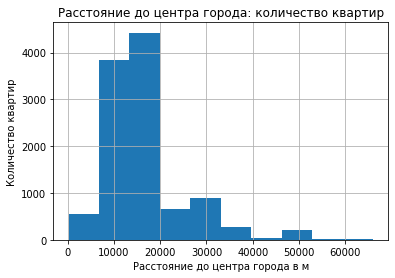

In [44]:
center_metres = df_filtered.loc[df_filtered['cityCenters_nearest'] >= 0, 'cityCenters_nearest']
center_metres.hist()
plt.title('Расстояние до центра города: количество квартир')
plt.xlabel('Расстояние до центра города в м')
plt.ylabel('Количество квартир')

Исходя из этого графика, можно сделать вывод, что большинство домов находятся в достаточно большом удалении от центра города, это либо спальные районы, либо пригород. Есть небольшой всплеск в 50 км от центра Петербурга, видимо, там находится какой-то довольно крупный областной город с большим количеством объектов в продаже. 

Text(0, 0.5, 'Количество квартир')

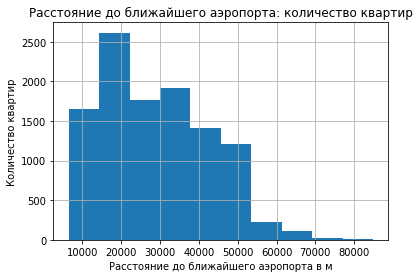

In [45]:
airport_metres = df_filtered.loc[df_filtered['airports_nearest'] >= 0, 'airports_nearest']
airport_metres.hist()
plt.title('Расстояние до ближайшего аэропорта: количество квартир')
plt.xlabel('Расстояние до ближайшего аэропорта в м')
plt.ylabel('Количество квартир')

Достаточно много объектов находятся в 5-10 километрах от аэропорта, исходя из этого можем сделать предположение, что они находятся на севере (или северо-западе/северо-востоке) Петербурга. Далее - 20-30 км, потом 40-50 км, и после этого резкое падение количества объектов. 

Text(0, 0.5, 'Количество квартир')

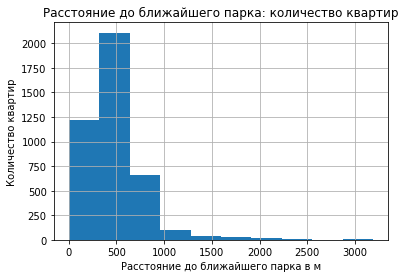

In [46]:
parks_metres = df_filtered.loc[df_filtered['parks_nearest'] >= 0, 'parks_nearest']
parks_metres.hist()
plt.title('Расстояние до ближайшего парка: количество квартир')
plt.xlabel('Расстояние до ближайшего парка в м')
plt.ylabel('Количество квартир')

Почти все представленные в выборке квартиры могут похвастаться парком в радиусе километра, при этом у подавляющего большинства парк в 500 метрах и меньше. Либо эти данные некорректны, либо в Ленобласти и правда много парков :)

Text(0, 0.5, 'Количество квартир')

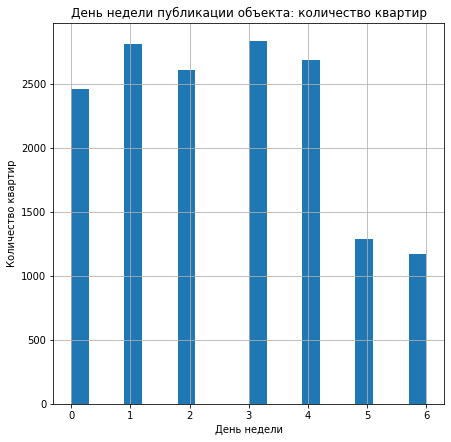

In [47]:
df_filtered['weekday'].hist(bins=20, figsize=(7, 7))
plt.title('День недели публикации объекта: количество квартир')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')

На графике видно, что меньше всего объявлений о продаже появлялось на выходных: видимо, владельцы недвижимости посвящали эти дни отдыху от забот. Из будней меньше всего объявлений выкладывалось в понедельник, что тоже весьма типично. 

Text(0, 0.5, 'Количество квартир')

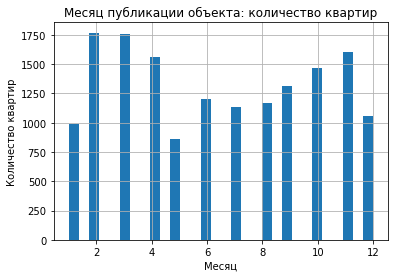

In [48]:
df_filtered['month'].hist(bins=30)
plt.title('Месяц публикации объекта: количество квартир')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')

Тут также начнем делать выводы сначала по минимальным значениям. Мы считаем, что те владельцы недвижимости, которым не требуется срочная продажа, прекрасно осведомлены о сезонности рынка недвижимости. Они понимают, что мертвый сезон - это лето, а также "праздничные" месяцы. В декабре никому уже нет дела до покупки, в январе никому еще нет дела до покупки. То же самое в мае, потому что многие отыхают. Явно видим тренд выставляемых объявлений с февраля по апрель и с сентября по ноябрь. 

**Теперь изучим, сколько дней объявления были актуальны**

Text(0, 0.5, 'Количество квартир')

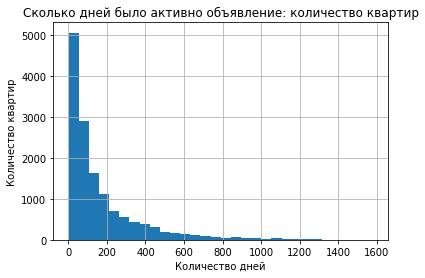

In [49]:
# изучаем, как быстро продавались квартиры: построим гистограмму
days_of_exposition = df_filtered.loc[df_filtered['days_exposition'] >= 0, 'days_exposition']

days_of_exposition.hist(bins=30)
plt.title('Сколько дней было активно объявление: количество квартир')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')


In [50]:

days_of_exposition.describe()

count    14201.000000
mean       165.006478
std        202.936302
min          1.000000
25%         42.000000
50%         86.000000
75%        209.000000
max       1580.000000
Name: days_exposition, dtype: float64

Судя по данным, медианное значение актуальности объявления - это 200 дней, то есть около полугода. Минимальное значение - 1 день. Это было либо очень привлекательное объявление, либо пользователь по каким-то причинам снял его с продажи. То же самое с максимальным значением: либо его забыли указать как "проданное", либо это был непривлекательный объект. 

Большинство квартир продаются за 100 дней (из них пик в районе 50 дней). Если объявление "висит" больше 200 дней, можно расценивать это факт как то, что это уже достаточно долго. 

Итак, мы исследовали полученные данные и сделали достаточно много интересных предположений. Если составлять "профиль самой рядовой квартиры", то он будет такой: общая площадь 40 квадратных метров, живая - 20, площадь кухни составит 6 или 8 метров, площадь потолков будет самой стандартной (2.75), цена составит 3.5 миллиона. Квартира будет располагаться на нижних этажах в 5-этажном доме достаточно далеко от центра города, и достаточно близко к аэропорту. Рядом будет парк :)

**Изучим, какие факторы влияют на стоимость объекта**

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

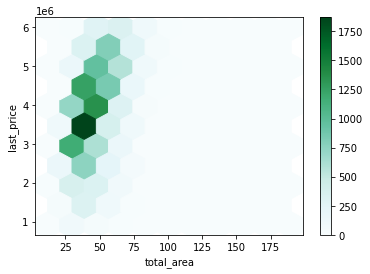

In [51]:
# построим диаграмму с сотами для выявления зависимости между ценой и общей площадью
df_filtered.plot(x='total_area', y='last_price', kind='hexbin', gridsize=10, sharex=False)

Видим, что, действительно, присутствует положительная корреляция между этими двумя параметрами, темные соты идут диагонально вправо, плюс есть совсем темные соты: значит, больше всего квартир общей площадью 40-50 кв. м и ценой около 4 миллионов. 

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

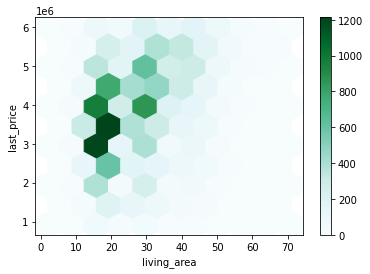

In [52]:
# построим диаграмму с сотами для выявления зависимости между ценой и общей площадью
df_filtered.plot(x='living_area', y='last_price', kind='hexbin', gridsize=10, sharex=False)

Здесь мы тоже видим определенную зависимость, однако светлых частей гораздо меньше, что указывает на более низкую корреляцию, наблюдается бОльшая разрозненность данных. Но можно сделать вывод, что квартир с жилой площадью 15-25 метров и ценой 3-3.5 миллиона - больше всего. 

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

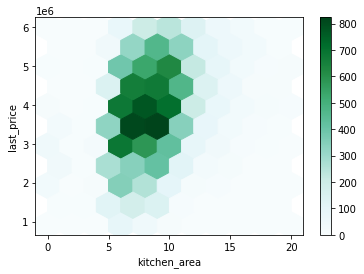

In [53]:
df_filtered.plot(x='kitchen_area', y='last_price', kind='hexbin', gridsize=10, sharex=False)

Тут тоже видим "темное пятно", но диаграмма довольно-таки разрозненная. Корреляция есть, но еще меньше, чем в случае с жилой площадью. 

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

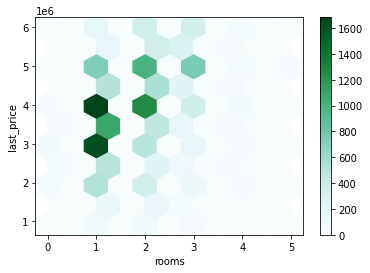

In [54]:
df_filtered.plot(x='rooms', y='last_price', kind='hexbin', gridsize=10, sharex=False)


<AxesSubplot:title={'center':'зависимость цены от типа этажа'}, xlabel='тип этажа', ylabel='цена'>

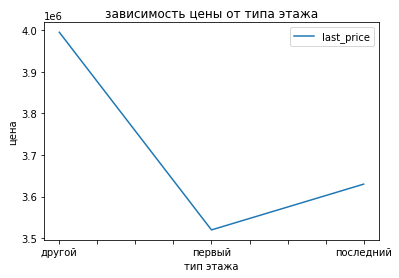

In [55]:
# переведем строковые значения типов этажей в цифровые
def floor_type_to_number(type):
    if type == 'первый':
        return 1
    if type == 'последний':
        return 3  
    if type == 'другой':
        return 2
df_filtered['floor_type_numbers'] = df_filtered['floor_type'].apply(floor_type_to_number)

# построим график
df_filtered.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot\
(title='зависимость цены от типа этажа',xlabel='тип этажа', ylabel='цена')


<AxesSubplot:title={'center':'зависимость цены от дня недели'}, xlabel='день недели', ylabel='цена'>

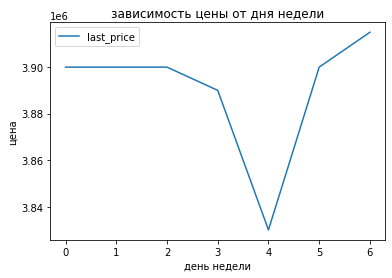

In [56]:
# построим линейный график
df_filtered.pivot_table(index='weekday', values='last_price', aggfunc='median').plot\
(title='зависимость цены от дня недели',xlabel='день недели', ylabel='цена')

<AxesSubplot:title={'center':'зависимость цены от месяца'}, xlabel='месяц', ylabel='цена'>

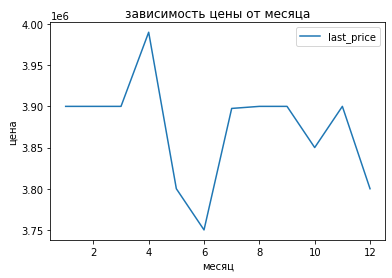

In [57]:
# построим линейный график
df_filtered.pivot_table(index='month', values='last_price', aggfunc='median').plot\
(title='зависимость цены от месяца',xlabel='месяц', ylabel='цена')

<AxesSubplot:title={'center':'зависимость цены от года'}, xlabel='год', ylabel='цена'>

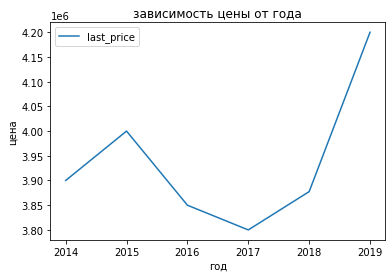

In [58]:
# построим линейный график
df_filtered.pivot_table(index='year', values='last_price', aggfunc='median').plot\
(title='зависимость цены от года',xlabel='год', ylabel='цена')

In [59]:
# построим таблицу с общей корреляцией (чтобы убедиться в выводах), нас интересует первая строка
price_factors = df_filtered.loc[:, ['last_price', 'total_area', 'living_area', 'kitchen_area','rooms', 'floor_type', 'weekday', 'month', 'year']]
price_factors.corr()

,last_price,total_area,living_area,kitchen_area,rooms,weekday,month,year
last_price,1.000000,0.437876,0.328532,0.311171,0.289687,-0.015071,0.000529,0.018258
total_area,0.437876,1.000000,0.888264,0.290723,0.808077,-0.010709,0.001827,-0.058789
living_area,0.328532,0.888264,1.000000,-0.044389,0.907143,-0.003998,-0.003597,-0.039735
kitchen_area,0.311171,0.290723,-0.044389,1.000000,-0.081507,-0.007782,0.006898,-0.033583
rooms,0.289687,0.808077,0.907143,-0.081507,1.000000,-0.002305,-0.005686,-0.033627
weekday,-0.015071,-0.010709,-0.003998,-0.007782,-0.002305,1.000000,0.005653,0.005507
month,0.000529,0.001827,-0.003597,0.006898,-0.005686,0.005653,1.000000,-0.269963
year,0.018258,-0.058789,-0.039735,-0.033583,-0.033627,0.005507,-0.269963,1.000000


В целом, эти данные лично для нас оказались немного неожиданными: мы ожидали увидеть бОльшую корреляцию с общей площадью, этажом или годом. Видимо, наши ожидания были ошибочными. 

**Найдем населенные пункты с самой низкой и высокой стоимостью за квадратный метр**

In [60]:
# сделаем таблицу с наибольшим количеством объявлений в поселении, выведем 10 из них
max_10_localities = df_filtered['locality_name'].value_counts().head(10)
print(max_10_localities)


санкт-петербург    8883
мурино              557
шушары              412
кудрово             399
всеволожск          369
колпино             316
гатчина             289
парголово           282
пушкин              228
выборг              219
Name: locality_name, dtype: int64


In [61]:
# вынесем в таблицу локации с самой маленькой и самой большой стоимостью за метр в порядке возрастания
max_10_localities = df_filtered.query('locality_name == ["санкт-петербург", "мурино", "шушары", "кудрово", "всеволожск", \
                             "колпино", "гатчина", "парголово", "пушкин", "выборг"]')
max_10_localities.pivot_table(index='locality_name', values='price_for_1sq_m').sort_values(by='price_for_1sq_m')

,price_for_1sq_m
locality_name,
выборг,58059.237808
всеволожск,66169.779837
гатчина,67614.182699
колпино,75019.795886
шушары,78383.123956
мурино,86089.305314
парголово,89994.899858
кудрово,95095.554010
пушкин,97232.707939


Можно сделать очевидный вывод: из локаций с самым большим количеством объявлений Выборг занимает последнее место в стоимости за квадратный метр. Петербург, наоборот, получает первое место. 

**Теперь постараемся выяснть, как близость к центру города влияет на стоимость жилья**

<AxesSubplot:title={'center':'зависимость цены от удаленности от центра'}, xlabel='расстояние до центра в км', ylabel='цена за квадратный метр'>

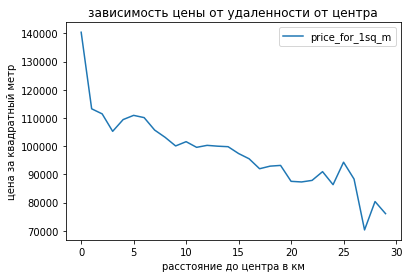

In [62]:
#сделаем отдельную переменную для данным по СПб
spb_km_to_center = df_filtered.query('locality_name == "санкт-петербург"')

# сгруппируем данные по столбцам со средней стоимостью за метр и удаленностью от центра. Построим график
spb_km_to_center.pivot_table(index='km_to_center', values='price_for_1sq_m', aggfunc='median').plot\
(title='зависимость цены от удаленности от центра',xlabel='расстояние до центра в км', ylabel='цена за квадратный метр')

Вывод вполне ожидаемый: чем дальше от центра, тем ниже стоимость за квадратный метр. 

### Общий вывод

В данном исследовании мы должны были изучить данные Яндекс.Недвижимости, чтобы найти интересные особенности и зависимости. После предобработки данных у нас получился довольно-таки усредненный тип объектов, повторимся еще раз:

Если составлять "профиль самой рядовой квартиры", то он будет такой: общая площадь 40 квадратных метров, живая - 20, площадь кухни составит 6 или 8 метров, площадь потолков будет самой стандартной (2.75), цена составит 3.5 миллиона. Квартира будет располагаться на нижних этажах в 5-этажном доме достаточно далеко от центра города, и достаточно близко к аэропорту. Рядом будет парк :)

В ходе работы мы сделали несколько интересных открытий. Первое - это зависимость публикации объявлений от дня недели (в меньшей степени, но все же на выходных публикаций меньше всего) и от месяца (в большей степени, тут явно прослеживается "мертвый сезон"). Из интересных "побочных" открытий - почти у всех объектов поблизости располагается парк. Также рядом с большим количеством объектов находится аэропорт. Довольно весомое количество объявлений - это спальные районы и пригороды Петербурга, судя по удаленности от центра. 

Неожиданным и достаточно неприятным открытием была слабоватая корреляция между стоимостью жилья и общей площадью, а также между стоимостью и годом. Честно говоря, ожидали увидеть что-то более убедительное. 
